In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pymannkendall as mk
from sympy import *


import gc
import timeit
import sys
import os

from random import normalvariate
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"

# Uniform distribution - constant population

### Not allowing trends in the observation data

## Make the set of num_rep observation vectors containing no trends

In [2]:
MK_test = 'exploding'
counter = 0
N_0 = 1000
T = 17
num_rep = 1000
alfa = 0.5 #0.35
e = np.zeros((num_rep,T))
while (MK_test != 'no trend') | (counter < num_rep):
    synt_obs = np.zeros(T)
    for i in range(T):
        synt_obs[i] = np.random.uniform(N_0 - alfa*N_0, N_0 + alfa*N_0)

    test_stat = mk.original_test(synt_obs)
    MK_test = test_stat[0]
    if MK_test == 'no trend':
        e[counter,:] = synt_obs/N_0
        counter = counter + 1  

# Scale synt_obs around 1.0
#e = synt_obs / np.mean(synt_obs)


## Increasing beta

Number observation series showing trends out of 1000 samples: [0. 0. 0. 0. 0. 0.]
Population size at t = T [ 999. 2109. 3218. 4327. 5437. 6546.]
95% quantile of the beta = 0 population: 1.3678966924817393
5% quantiles of the beta > 0 populations: 1.1234935692911392 1.393507109903468 1.5893099179014776 1.7334339299292634 1.8433090732030277
Upper bound of N_0 interval = ( 1.393507109903468 )


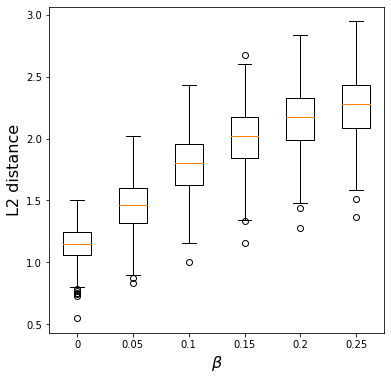

In [3]:
r = 0.2
T = 17
N = np.ones(T+1)
N[0] = 1000
h = 0.2
num_rep = 1000
L2 = np.zeros((6,num_rep))
end_pop = np.zeros((6))
beta_val = [0, 0.05, 0.1, 0.15, 0.2, 0.25]

num_trends = np.zeros(6)
counter = 0
for beta in beta_val:
    count_trends = 0
    for k in range(num_rep):
        for t in range(1,T+1):
            index = np.arange(0,t)
            h_array = np.ones(t)
            h_sum = np.sum((h_array*(1+r))**index)  
            N[t] = N[0]*((1+beta)*(1+r)**t - h*h_sum)
            if N[t] < 0:
                N[t] = 0
        
        # Record end population sizes
        end_pop[counter] = int(N[-1])
        
        # M-K test
        test_stat = mk.original_test(e[k,:])
        if test_stat[0] != 'no trend':
            count_trends = count_trends+1
        
        # Calculate scaling factor s
        s = np.sum(np.multiply(N[1:], e[k,:])) / np.sum(
                    np.multiply(N[1:],N[1:]))
        
        L2[counter,k] = (np.sum((s*N[1:] - e[k,:])**2))**(1/2)
    num_trends[counter] = count_trends
    counter = counter + 1
L2_00 = L2
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))
ax.boxplot([L2[0,:], L2[1,:], L2[2,:], L2[3,:], L2[4,:], L2[5,:]])
ax.set_xticks([1, 2, 3, 4, 5, 6], ['0', '0.05', '0.1', '0.15', '0.2', '0.25'])

ax.set_xlabel(r'$\beta$', fontsize=16)
ax.set_ylabel('L2 distance', fontsize=16)

print('Number observation series showing trends out of', num_rep,'samples:', num_trends)
print('Population size at t = T', end_pop)
print('95% quantile of the beta = 0 population:', np.quantile(L2[0,:], 0.95))
print('5% quantiles of the beta > 0 populations:', np.quantile(L2[1,:], 0.05), np.quantile(L2[2,:], 0.05), np.quantile(L2[3,:], 0.05), np.quantile(L2[4,:], 0.05), np.quantile(L2[5,:], 0.05))

# Find upper bound of N_0 interval
q_set = [np.quantile(L2[1,:], 0.05), np.quantile(L2[2,:], 0.05), np.quantile(L2[3,:], 0.05), np.quantile(L2[4,:], 0.05), np.quantile(L2[5,:], 0.05)]
res = next(x for x, val in enumerate(q_set) if val > np.quantile(L2[0,:], 0.95))
res_00 = res
beta_00 = beta_val[res+1]
print('Upper bound of N_0 interval = (', q_set[res],')')
upper_bound_uniform_00 = q_set[res]
pass;

## Decreasing beta

Number e-series showing trends out of 1000 samples: [0. 0. 0. 0. 0. 0.]
Population size at t = T [999. 556. 112.   0.   0.   0.]
95% quantile of the beta = 0 population: 1.3678966924817393
5% quantiles of the beta > 0 populations: 1.0069489624079626 1.3998259857349964 1.868382136013069 2.155547343515538 2.359524901175909
Lower bound of N_0 interval = ( 1.3998259857349964 )


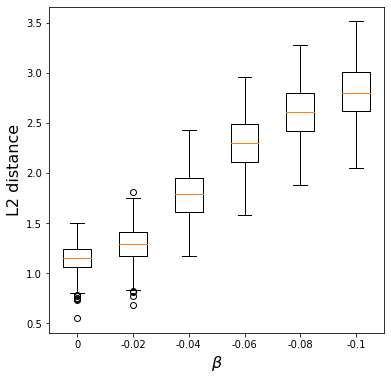

In [4]:
r = 0.2
T = 17
N = np.ones(T+1)
N[0] = 1000
h = 0.2
num_rep = 1000
L2 = np.zeros((6,num_rep))
end_pop = np.zeros((6))
beta_val = [0, -0.02, -0.04, -0.06, -0.08, -0.1]

num_trends = np.zeros(6)
counter = 0
for beta in beta_val:
    count_trends = 0
    for k in range(num_rep):
        for t in range(1,T+1):
            index = np.arange(0,t)
            h_array = np.ones(t)
            h_sum = np.sum((h_array*(1+r))**index)  
            N[t] = N[0]*((1+beta)*(1+r)**t - h*h_sum)
            if N[t] < 0:
                N[t] = 0
        
        # Record end population sizes
        end_pop[counter] = int(N[-1])
        
        # M-K test
        test_stat = mk.original_test(e[k,:])
        if test_stat[0] != 'no trend':
            count_trends = count_trends+1
        
        # Calculate scaling factor s
        s = np.sum(np.multiply(N[1:], e[k,:])) / np.sum(
                    np.multiply(N[1:],N[1:]))
        
        L2[counter,k] = (np.sum((s*N[1:] - e[k,:])**2))**(1/2)
    num_trends[counter] = count_trends
    counter = counter + 1
L2_10 = L2
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))
ax.boxplot([L2[0,:], L2[1,:], L2[2,:], L2[3,:], L2[4,:], L2[5,:]])
ax.set_xticks([1, 2, 3, 4, 5, 6], ['0', '-0.02', '-0.04', '-0.06', '-0.08', '-0.1'])

ax.set_xlabel(r'$\beta$', fontsize=16)
ax.set_ylabel('L2 distance', fontsize=16)

print('Number e-series showing trends out of', num_rep,'samples:', num_trends)
print('Population size at t = T', end_pop)
print('95% quantile of the beta = 0 population:', np.quantile(L2[0,:], 0.95))
print('5% quantiles of the beta > 0 populations:', np.quantile(L2[1,:], 0.05), np.quantile(L2[2,:], 0.05), np.quantile(L2[3,:], 0.05), np.quantile(L2[4,:], 0.05), np.quantile(L2[5,:], 0.05))

# Find upper bound of N_0 interval
q_set = [np.quantile(L2[1,:], 0.05), np.quantile(L2[2,:], 0.05), np.quantile(L2[3,:], 0.05), np.quantile(L2[4,:], 0.05), np.quantile(L2[5,:], 0.05)]
res = next(x for x, val in enumerate(q_set) if val > np.quantile(L2[0,:], 0.95))
res_10 = res
beta_10 = beta_val[res+1]
print('Lower bound of N_0 interval = (', q_set[res],')')
lower_bound_uniform_10 = q_set[res]
pass;

# Normal distribution - constant population

### Not allowing trends in the observation data

## Make the set of num_rep e vectors containing no trends

In [5]:
MK_test = 'exploding'
counter = 0
N_0 = 1000
T = 17
num_rep = 1000
c_v = 0.3 #0.2
e = np.zeros((num_rep,T))
while (MK_test != 'no trend') | (counter < num_rep):
    synt_obs = np.zeros(T)
    for i in range(T):
        synt_obs[i] = np.random.normal(N[0], c_v*N[0])

    test_stat = mk.original_test(synt_obs)
    MK_test = test_stat[0]
    if MK_test == 'no trend':
        e[counter,:] = synt_obs/N_0
        counter = counter + 1  


## Increasing beta

Number e-series showing trends out of 1000 samples: [0. 0. 0. 0. 0. 0.]
Population size at t = T [ 999. 2109. 3218. 4327. 5437. 6546.]
95% quantile of the beta = 0 population: 1.5530966102933037
5% quantiles of the beta > 0 populations: 1.090231225282479 1.3898707175261642 1.598882620877522 1.7438061151315365 1.84759037145888
Upper bound of N_0 interval = ( 1.598882620877522 )


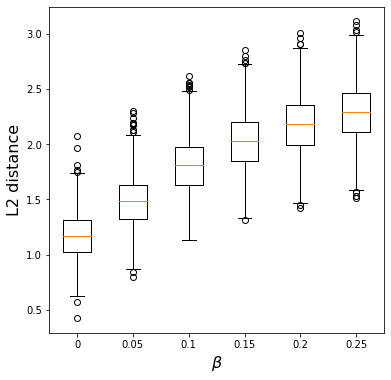

In [6]:
r = 0.2
T = 17
N = np.ones(T+1)
N[0] = 1000
h = 0.2
num_rep = 1000
L2 = np.zeros((6,num_rep))
end_pop = np.zeros((6))
beta_val = [0, 0.05, 0.1, 0.15, 0.2, 0.25]

num_trends = np.zeros(6)
counter = 0
for beta in beta_val:
    count_trends = 0
    for k in range(num_rep):
        for t in range(1,T+1):
            index = np.arange(0,t)
            h_array = np.ones(t)
            h_sum = np.sum((h_array*(1+r))**index)  
            N[t] = N[0]*((1+beta)*(1+r)**t - h*h_sum)
            if N[t] < 0:
                N[t] = 0
        
        # Record end population sizes
        end_pop[counter] = int(N[-1])
        
        # M-K test
        test_stat = mk.original_test(e[k,:])
        if test_stat[0] != 'no trend':
            count_trends = count_trends+1
        
        # Calculate scaling factor s
        s = np.sum(np.multiply(N[1:], e[k,:])) / np.sum(
                    np.multiply(N[1:],N[1:]))
        
        L2[counter,k] = (np.sum((s*N[1:] - e[k,:])**2))**(1/2)
    num_trends[counter] = count_trends
    counter = counter + 1
L2_01 = L2
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))
ax.boxplot([L2[0,:], L2[1,:], L2[2,:], L2[3,:], L2[4,:], L2[5,:]])
ax.set_xticks([1, 2, 3, 4, 5, 6], ['0', '0.05', '0.1', '0.15', '0.2', '0.25'])

ax.set_xlabel(r'$\beta$', fontsize=16)
ax.set_ylabel('L2 distance', fontsize=16)

print('Number e-series showing trends out of', num_rep,'samples:', num_trends)
print('Population size at t = T', end_pop)
print('95% quantile of the beta = 0 population:', np.quantile(L2[0,:], 0.95))
print('5% quantiles of the beta > 0 populations:', np.quantile(L2[1,:], 0.05), np.quantile(L2[2,:], 0.05), np.quantile(L2[3,:], 0.05), np.quantile(L2[4,:], 0.05), np.quantile(L2[5,:], 0.05))

# Find upper bound of N_0 interval
q_set = [np.quantile(L2[1,:], 0.05), np.quantile(L2[2,:], 0.05), np.quantile(L2[3,:], 0.05), np.quantile(L2[4,:], 0.05), np.quantile(L2[5,:], 0.05)]
res = next(x for x, val in enumerate(q_set) if val > np.quantile(L2[0,:], 0.95))
res_01 = res
beta_01 = beta_val[res+1]
print('Upper bound of N_0 interval = (', q_set[res],')')
upper_bound_normal_01 = q_set[res]
pass;

## Decreasing beta

Number e-series showing trends out of 1000 samples: [0. 0. 0. 0. 0. 0.]
Population size at t = T [999. 556. 112.   0.   0.   0.]
95% quantile of the beta = 0 population: 1.5530966102933037
5% quantiles of the beta > 0 populations: 0.9546846158049278 1.3905961529005073 1.8725361733660881 2.160910683769544 2.3685327649511243
Lower bound of N_0 interval = ( 1.8725361733660881 )


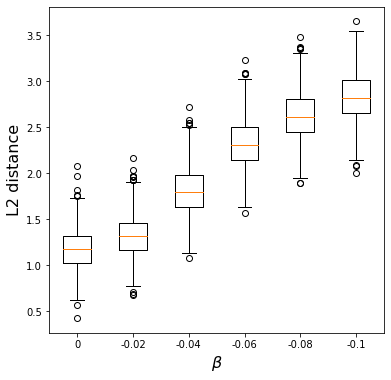

In [7]:
r = 0.2
T = 17
N = np.ones(T+1)
N[0] = 1000
h = 0.2
num_rep = 1000
L2 = np.zeros((6,num_rep))
end_pop = np.zeros((6))
beta_val = [0, -0.02, -0.04, -0.06, -0.08, -0.1]

num_trends = np.zeros(6)
counter = 0
for beta in beta_val:
    count_trends = 0
    for k in range(num_rep):
        for t in range(1,T+1):
            index = np.arange(0,t)
            h_array = np.ones(t)
            h_sum = np.sum((h_array*(1+r))**index)  
            N[t] = N[0]*((1+beta)*(1+r)**t - h*h_sum)
            if N[t] < 0:
                N[t] = 0
        
        # Record end population sizes
        end_pop[counter] = int(N[-1])
        
        # M-K test
        test_stat = mk.original_test(e[k,:])
        if test_stat[0] != 'no trend':
            count_trends = count_trends+1
        
        # Calculate scaling factor s
        s = np.sum(np.multiply(N[1:], e[k,:])) / np.sum(
                    np.multiply(N[1:],N[1:]))
        
        L2[counter,k] = (np.sum((s*N[1:] - e[k,:])**2))**(1/2)
    num_trends[counter] = count_trends
    counter = counter + 1
L2_11 = L2
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))
ax.boxplot([L2[0,:], L2[1,:], L2[2,:], L2[3,:], L2[4,:], L2[5,:]])
ax.set_xticks([1, 2, 3, 4, 5, 6], ['0', '-0.02', '-0.04', '-0.06', '-0.08', '-0.1'])

ax.set_xlabel(r'$\beta$', fontsize=16)
ax.set_ylabel('L2 distance', fontsize=16)

print('Number e-series showing trends out of', num_rep,'samples:', num_trends)
print('Population size at t = T', end_pop)
print('95% quantile of the beta = 0 population:', np.quantile(L2[0,:], 0.95))
print('5% quantiles of the beta > 0 populations:', np.quantile(L2[1,:], 0.05), np.quantile(L2[2,:], 0.05), np.quantile(L2[3,:], 0.05), np.quantile(L2[4,:], 0.05), np.quantile(L2[5,:], 0.05))

# Find lower bound of N_0 interval
q_set = [np.quantile(L2[1,:], 0.05), np.quantile(L2[2,:], 0.05), np.quantile(L2[3,:], 0.05), np.quantile(L2[4,:], 0.05), np.quantile(L2[5,:], 0.05)]
res = next(x for x, val in enumerate(q_set) if val > np.quantile(L2[0,:], 0.95))
res_11 = res
beta_11 = beta_val[res+1]
print('Lower bound of N_0 interval = (', q_set[res],')')
lower_bound_normal_11 = q_set[res]

pass;

## Plotting all four cases in one figure

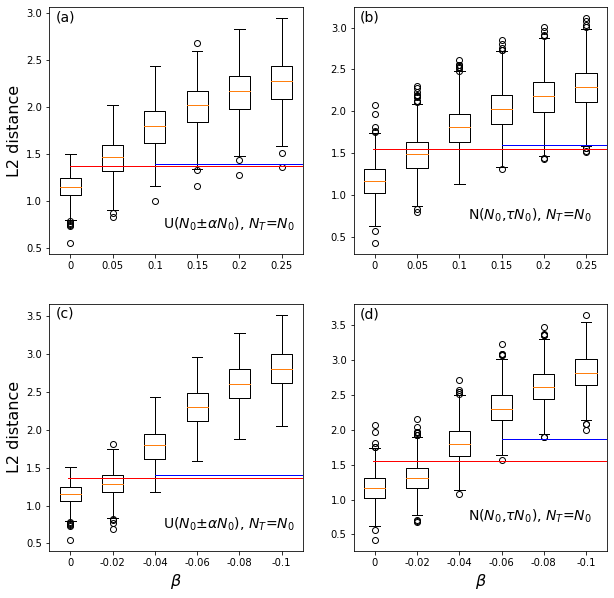

In [8]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
axs[0,0].boxplot([L2_00[0,:], L2_00[1,:], L2_00[2,:], L2_00[3,:], L2_00[4,:], L2_00[5,:]])
axs[0,0].set_ylabel('L2 distance', fontsize=16)
axs[0,0].set_xticks([1, 2, 3, 4, 5, 6], ['0', '0.05', '0.1', '0.15', '0.2', '0.25'])
axs[0,0].text(0.65,0.99*max(L2_00[5,:]),'(a)', fontsize=14)
# Find the xtick positions relative to the x axis
x_min, x_max = axs[0,0].get_xlim()
ticks = [(tick - x_min)/(x_max - x_min) for tick in axs[0,0].get_xticks()]
axs[0,0].axhline(y=np.quantile(L2_00[0,:],0.95), xmin=ticks[0], xmax=1, linewidth=1, color = 'r')
axs[0,0].axhline(y=np.quantile(L2_00[res_00+1,:],0.05), xmin=ticks[res_00+1], xmax=1, linewidth=1, color = 'b')
axs[0,0].text(3.2,0.7,r'U($N_0$$\pm$$\alpha$$N_0$), $N_T$=$N_0$', fontsize=14)
               
axs[0,1].boxplot([L2_01[0,:], L2_01[1,:], L2_01[2,:], L2_01[3,:], L2_01[4,:], L2_01[5,:]])
#axs[0,1].set_ylabel('L2 distance', fontsize=16)
axs[0,1].set_xticks([1, 2, 3, 4, 5, 6], ['0', '0.05', '0.1', '0.15', '0.2', '0.25'])
axs[0,1].text(0.65,0.99*max(L2_01[5,:]),'(b)', fontsize=14)
axs[0,1].axhline(y=np.quantile(L2_01[0,:],0.95), xmin=0.075, xmax=1, linewidth=1, color = 'r')
axs[0,1].axhline(y=np.quantile(L2_01[res_01+1,:],0.05), xmin=ticks[res_01+1], xmax=1, linewidth=1, color = 'b')
axs[0,1].text(3.2,0.7,r'N($N_0$,$\tau$$N_0$), $N_T$=$N_0$', fontsize=14)

axs[1,0].boxplot([L2_10[0,:], L2_10[1,:], L2_10[2,:], L2_10[3,:], L2_10[4,:], L2_10[5,:]])
axs[1,0].set_ylabel('L2 distance', fontsize=16)
axs[1,0].set_xticks([1, 2, 3, 4, 5, 6], ['0', '-0.02', '-0.04', '-0.06', '-0.08', '-0.1'])
axs[1,0].set_xlabel(r'$\beta$', fontsize=16)
axs[1,0].set_ylabel('L2 distance', fontsize=16)
axs[1,0].text(0.65,0.99*max(L2_10[5,:]),'(c)', fontsize=14)
axs[1,0].axhline(y=np.quantile(L2_10[0,:],0.95), xmin=0.075, xmax=1, linewidth=1, color = 'r')
axs[1,0].axhline(y=np.quantile(L2_10[res_10+1,:],0.05), xmin=ticks[res_10+1], xmax=1, linewidth=1, color = 'b')
axs[1,0].text(3.2,0.7,r'U($N_0$$\pm$$\alpha$$N_0$), $N_T$=$N_0$', fontsize=14)

axs[1,1].boxplot([L2_11[0,:], L2_11[1,:], L2_11[2,:], L2_11[3,:], L2_11[4,:], L2_11[5,:]])
axs[1,1].set_xticks([1, 2, 3, 4, 5, 6], ['0', '-0.02', '-0.04', '-0.06', '-0.08', '-0.1'])
axs[1,1].set_xlabel(r'$\beta$', fontsize=16)
axs[1,1].text(0.65,0.985*max(L2_11[5,:]),'(d)', fontsize=14)
axs[1,1].axhline(y=np.quantile(L2_11[0,:],0.95), xmin=0.075, xmax=1, linewidth=1, color = 'r')
axs[1,1].axhline(y=np.quantile(L2_11[res_11+1,:],0.05), xmin=ticks[res_11+1], xmax=1, linewidth=1, color = 'b')
axs[1,1].text(3.2,0.7,r'N($N_0$,$\tau$$N_0$), $N_T$=$N_0$', fontsize=14)

save_dir = "figures/"
plt.savefig(save_dir + "Figure_S3.pdf", dpi=600, bbox_inches="tight")
pass;

# Using the estimation approach

In [9]:
alfa = 0.35 
c_v = 0.2 

## Making subplot 0_0 - uniform distribution - constant base trajectory

In [10]:
%%time
# Uniform distribution constant base population
r = 0.2
h = 0.2
num_rep = 1000
time_series_length = [10, 20, 30]
init_pop = np.arange(500,4000,5)
L2_min_00 = np.zeros((len(time_series_length),num_rep,3))
N_0 = 2000

counter0 = 0
for T in time_series_length:
    
    # Make num_rep observation series - uniform
    MK_test = 'exploding'
    counter1 = 0
    obs = np.zeros((num_rep,T+1))
    while (MK_test != 'no trend') | (counter1 < num_rep):
        synt_obs = np.zeros(T+1)
        for i in range(T+1):
            synt_obs[i] = np.random.uniform(N_0 - alfa*N_0, N_0 + alfa*N_0)
        test_stat = mk.original_test(synt_obs)
        MK_test = test_stat[0]
        if MK_test == 'no trend':
            obs[counter1,:] = synt_obs/N_0
            counter1 = counter1 + 1 
    
    for k in range(num_rep):
        L2 = 1000
        for pop in init_pop:
            # Calculate population trajectory and L2
            N = np.zeros(T+1)
            N[0] = pop
            for t in range(1,T+1):
                index = np.arange(0,t)
                h_array = np.ones(t)
                h_sum = np.sum((h_array*(1+r))**index)  
                N[t] = N[0]*(1+r)**t - h*N_0*h_sum
                if N[t] < 0:
                    N[t] = 0

            # Calculate scaling factor s
            e = obs[k,:]  
            s = np.sum(np.multiply(N[1:], e[1:])) / np.sum(
                        np.multiply(N[1:],N[1:]))
            L2_new = (np.sum((s*N[1:] - e[1:])**2))**(1/2)
            if L2_new < L2:
                L2 = L2_new
                record = [N[0],N[-1],L2]
        L2_min_00[counter0,k,:] = record
    
    counter0 = counter0 + 1   


CPU times: user 9min 38s, sys: 9.21 s, total: 9min 47s
Wall time: 9min 40s


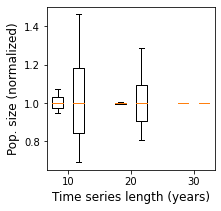

In [11]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(3, 3))
ax.boxplot([L2_min_00[0,:,0]/N_0, L2_min_00[1,:,0]/N_0, L2_min_00[2,:,0]/N_0], whis=[5, 95], showfliers=False, positions=[1,4,7])
ax.boxplot([L2_min_00[0,:,1]/N_0, L2_min_00[1,:,1]/N_0, L2_min_00[2,:,1]/N_0], whis=[5, 95], showfliers=False, positions=[2,5,8])
ax.set_xticks([1.5,4.5,7.5], ['10', '20', '30'])
ax.set_xlabel('Time series length (years)', fontsize=12)
ax.set_ylabel('Pop. size (normalized)', fontsize=12)
pass;

### Testing with the observation record from Sunndal

In [12]:
#%%time
r = 0.2
h = 0.2
num_rep = 1
time_series_length = [10, 20, 30]
init_pop = np.arange(500,4000,5)
estimates = np.zeros((len(init_pop),3))
N_0 = 2100
T = 17
# Sunndal data
obs = [
        0.46,
        0.39,
        0.32,
        0.47,
        0.47,
        0.25,
        0.43,
        0.36,
        0.36,
        0.39,
        0.47,
        0.36,
        0.42,
        0.39,
        0.43,
        0.37,
        0.34,
    ]
  
counter2 = 0
for pop in init_pop:
    # Calculate population trajectory and L2
    N = np.zeros(T+1)
    N[0] = pop
    for t in range(1,T+1):
        index = np.arange(0,t)
        h_array = np.ones(t)
        h_sum = np.sum((h_array*(1+r))**index)  
        N[t] = N[0]*(1+r)**t - h*N_0*h_sum
        if N[t] < 0:
            N[t] = 0

    # Calculate scaling factor s
    s = np.sum(np.multiply(N[1:], obs[:])) / np.sum(
                np.multiply(N[1:],N[1:]))
    L2 = (np.sum((s*N[1:] - obs[:])**2))**(1/2)

    estimates[counter2,:] = [N[0], N[-1], L2]
    counter2 = counter2 + 1


In [13]:
test = estimates
ind = np.argsort(test[:,-1])
b = test[ind]
b[0:20]

array([[2.09500000e+03, 1.98906944e+03, 2.39140960e-01],
       [2.09000000e+03, 1.87813889e+03, 2.39681626e-01],
       [2.10000000e+03, 2.10000000e+03, 2.41149209e-01],
       [2.08500000e+03, 1.76720833e+03, 2.43038312e-01],
       [2.10500000e+03, 2.21093056e+03, 2.45384771e-01],
       [2.08000000e+03, 1.65627778e+03, 2.49396603e-01],
       [2.11000000e+03, 2.32186111e+03, 2.51502923e-01],
       [2.07500000e+03, 1.54534722e+03, 2.58845856e-01],
       [2.11500000e+03, 2.43279167e+03, 2.59163839e-01],
       [2.12000000e+03, 2.54372222e+03, 2.68052691e-01],
       [2.07000000e+03, 1.43441667e+03, 2.71380857e-01],
       [2.12500000e+03, 2.65465278e+03, 2.77890972e-01],
       [2.06500000e+03, 1.32348611e+03, 2.86917818e-01],
       [2.13000000e+03, 2.76558333e+03, 2.88440555e-01],
       [2.13500000e+03, 2.87651389e+03, 2.99502856e-01],
       [2.06000000e+03, 1.21255556e+03, 3.05318206e-01],
       [2.14000000e+03, 2.98744444e+03, 3.10915245e-01],
       [2.14500000e+03, 3.09837

### Testing with the observation record from Vestnes

In [14]:
#%%time
r = 0.2
h = 0.2
num_rep = 1
time_series_length = [10, 20, 30]
init_pop = np.arange(500,4000,5)
estimates = np.zeros((len(init_pop),3))
N_0 = 2500
T = 17
# Sunndal data
obs = [
        0.699,
        0.673,
        0.658,
        0.689,
        0.580,
        0.728,
        0.494,
        0.482,
        0.528,
        0.660,
        0.669,
        0.369,
        0.687,
        0.621,
        0.727,
        0.529,
        0.624,
    ]

    
counter2 = 0
for pop in init_pop:
    # Calculate population trajectory and L2
    N = np.zeros(T+1)
    N[0] = pop
    for t in range(1,T+1):
        index = np.arange(0,t)
        h_array = np.ones(t)
        h_sum = np.sum((h_array*(1+r))**index)  
        N[t] = N[0]*(1+r)**t - h*N_0*h_sum
        if N[t] < 0:
            N[t] = 0

    # Calculate scaling factor s
    s = np.sum(np.multiply(N[1:], obs[:])) / np.sum(
                np.multiply(N[1:],N[1:]))
    L2 = (np.sum((s*N[1:] - obs[:])**2))**(1/2)

    estimates[counter2,:] = [N[0], N[-1], L2]
    counter2 = counter2 + 1


In [15]:
test = estimates
ind=np.argsort(test[:,-1])
b=test[ind]
b[0:20]

array([[2.49500000e+03, 2.38906944e+03, 4.01474012e-01],
       [2.49000000e+03, 2.27813889e+03, 4.02749816e-01],
       [2.50000000e+03, 2.50000000e+03, 4.02803996e-01],
       [2.50500000e+03, 2.61093056e+03, 4.06489701e-01],
       [2.48500000e+03, 2.16720833e+03, 4.06847159e-01],
       [2.51000000e+03, 2.72186111e+03, 4.12261650e-01],
       [2.48000000e+03, 2.05627778e+03, 4.13934465e-01],
       [2.51500000e+03, 2.83279167e+03, 4.19845352e-01],
       [2.47500000e+03, 1.94534722e+03, 4.24124063e-01],
       [2.52000000e+03, 2.94372222e+03, 4.28973436e-01],
       [2.47000000e+03, 1.83441667e+03, 4.37469224e-01],
       [2.52500000e+03, 3.05465278e+03, 4.39394593e-01],
       [2.53000000e+03, 3.16558333e+03, 4.50879244e-01],
       [2.46500000e+03, 1.72348611e+03, 4.53967221e-01],
       [2.53500000e+03, 3.27651389e+03, 4.63222354e-01],
       [2.46000000e+03, 1.61255556e+03, 4.73567262e-01],
       [2.54000000e+03, 3.38744444e+03, 4.76244045e-01],
       [2.54500000e+03, 3.49837

## Making subplot 0_1 - normal distribution - constant base trajectory

In [16]:
%%time
# Normal distribution - constant base population
r = 0.2
h = 0.2
num_rep = 1000
time_series_length = [10, 20, 30]
init_pop = np.arange(500,4000,5)
L2_min_01 = np.zeros((len(time_series_length),num_rep,3))
N_0 = 2000

counter0 = 0
for T in time_series_length:
    
    # Make num_rep observation series - normal
    MK_test = 'exploding'
    counter1 = 0
    obs = np.zeros((num_rep,T+1))
    while (MK_test != 'no trend') | (counter1 < num_rep):
        synt_obs = np.zeros(T+1)
        for i in range(T+1):
            synt_obs[i] = np.random.normal(N_0, c_v*N_0)
        test_stat = mk.original_test(synt_obs)
        MK_test = test_stat[0]
        if MK_test == 'no trend':
            obs[counter1,:] = synt_obs/N_0
            counter1 = counter1 + 1 
    
    for k in range(num_rep):
        L2 = 1000
        for pop in init_pop:
            # Calculate population trajectory and L2
            N = np.zeros(T+1)
            N[0] = pop
            for t in range(1,T+1):
                index = np.arange(0,t)
                h_array = np.ones(t)
                h_sum = np.sum((h_array*(1+r))**index)  
                N[t] = N[0]*(1+r)**t - h*N_0*h_sum
                if N[t] < 0:
                    N[t] = 0

            # Calculate scaling factor s
            e = obs[k,:]  
            s = np.sum(np.multiply(N[1:], e[1:])) / np.sum(
                        np.multiply(N[1:],N[1:]))
            L2_new = (np.sum((s*N[1:] - e[1:])**2))**(1/2)
            if L2_new < L2:
                L2 = L2_new
                record = [N[0],N[-1],L2]
        L2_min_01[counter0,k,:] = record
    
    counter0 = counter0 + 1   


CPU times: user 9min 39s, sys: 8.66 s, total: 9min 48s
Wall time: 9min 42s


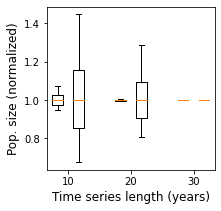

In [17]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(3, 3))
ax.boxplot([L2_min_01[0,:,0]/N_0, L2_min_01[1,:,0]/N_0, L2_min_01[2,:,0]/N_0], whis=[5, 95], showfliers=False, positions=[1,4,7], labels = ['N_0','N_0','N_0'])
ax.boxplot([L2_min_01[0,:,1]/N_0, L2_min_01[1,:,1]/N_0, L2_min_01[2,:,1]/N_0], whis=[5, 95], showfliers=False, positions=[2,5,8])
ax.set_xticks([1.5,4.5,7.5], ['10', '20', '30'])
ax.set_xlabel('Time series length (years)', fontsize=12)
ax.set_ylabel('Pop. size (normalized)', fontsize=12)
pass;

## Making subplot 1_0 - uniform distribution - increasing base trajectory

In [18]:
# Making base trajectories
T = [10, 20, 30]
N_0 = 2000
r = 0.2
h = [0.1805, 0.1973, 0.199575]
N_base = np.zeros((3,T[2]+1))

for k in range(3):
    N_base[k,0] = N_0
    for t in range(1,T[k]+1):
        index = np.arange(0,t)
        h_array = np.ones(t)
        h_sum = np.sum((h_array*(1+r))**index)  
        N_base[k,t] = N_base[k,0]*((1+r)**t - h[k]*h_sum)

In [19]:
%%time
# Uniform distribution - growing base population
r = 0.2
num_rep = 1000
time_series_length = [10, 20, 30]
init_pop = np.arange(1500,6000,5)
L2_min_10 = np.zeros((len(time_series_length),num_rep,3))
N_0 = 2000


counter0 = 0
for T in time_series_length:
    
    # Make num_rep observation series - uniform
    obs = np.zeros((num_rep,T+1))
    for j in range(num_rep):
        synt_obs = np.zeros(T+1)
        for i in range(T+1):
            #synt_obs[i] = np.random.uniform(N_base[counter0,i] - alfa*N_base[counter0,0], N_base[counter0,i] + alfa*N_base[counter0,0])
            synt_obs[i] = np.random.uniform(N_base[counter0,i] - alfa*N_0, N_base[counter0,i] + alfa*N_0)
        #obs[j,:] = synt_obs/N_0
        obs[j,:] = synt_obs/np.mean(N_base[counter0,1:T+1])
    
    for k in range(num_rep):
        L2 = 1000
        for pop in init_pop:
            # Calculate population trajectory and L2
            N = np.zeros(T+1)
            N[0] = pop
            for t in range(1,T+1):
                index = np.arange(0,t)
                h_array = np.ones(t)
                h_sum = np.sum((h_array*(1+r))**index)  
                N[t] = N[0]*(1+r)**t - h[counter0]*N_0*h_sum
                if N[t] < 0:
                    N[t] = 0

            # Calculate scaling factor s
            e = obs[k,:]  
            s = np.sum(np.multiply(N[1:], e[1:])) / np.sum(
                        np.multiply(N[1:],N[1:]))
            L2_new = (np.sum((s*N[1:] - e[1:])**2))**(1/2)
            if L2_new < L2:
                L2 = L2_new
                record = [N[0],N[-1],L2]
        L2_min_10[counter0,k,:] = record
    
    counter0 = counter0 + 1   


CPU times: user 12min 14s, sys: 12.1 s, total: 12min 26s
Wall time: 12min 17s


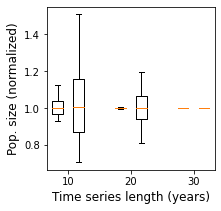

In [20]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(3, 3))
N_T = N_0*1.5
#L2_min_10[2,:,0] = [2000]*num_rep
#L2_min_10[2,:,1] = [3004]*num_rep
ax.boxplot([L2_min_10[0,:,0]/N_0, L2_min_10[1,:,0]/N_0, L2_min_10[2,:,0]/N_0], whis=[5, 95], showfliers=False, positions=[1,4,7])
#ax.boxplot([L2_min_10[0,:,1]/N_0, L2_min_10[1,:,1]/N_0, L2_min_10[2,:,1]/N_0], whis=[5, 95], showfliers=False, positions=[2,5,8])
ax.boxplot([L2_min_10[0,:,1]/N_T, L2_min_10[1,:,1]/N_T, L2_min_10[2,:,1]/N_T], whis=[5, 95], showfliers=False, positions=[2,5,8])

ax.set_xticks([1.5,4.5,7.5], ['10', '20', '30'])
ax.set_xlabel('Time series length (years)', fontsize=12)
ax.set_ylabel('Pop. size (normalized)', fontsize=12)
pass;

## Making subplot 1_1 - uniform distribution - decreasing base trajectory

In [21]:
# Making base trajectories
T = [10, 20, 30]
N_0 = 2000
r = 0.2
h = [0.2192, 0.20266, 0.20042]
N_base = np.zeros((3,T[2]+1))

for k in range(3):
    N_base[k,0] = N_0
    for t in range(1,T[k]+1):
        index = np.arange(0,t)
        h_array = np.ones(t)
        h_sum = np.sum((h_array*(1+r))**index)  
        N_base[k,t] = N_base[k,0]*((1+r)**t - h[k]*h_sum)

In [22]:
%%time
# Uniform distribution - growing base population
r = 0.2
num_rep = 1000
time_series_length = [10, 20, 30]
init_pop = np.arange(500,4000,5)
L2_min_11 = np.zeros((len(time_series_length),num_rep,3))
N_0 = 2000

counter0 = 0
for T in time_series_length:
    
    # Make num_rep observation series - uniform
    obs = np.zeros((num_rep,T+1))
    for j in range(num_rep):
        synt_obs = np.zeros(T+1)
        for i in range(T+1):
            #synt_obs[i] = np.random.uniform(N_base[counter0,i] - alfa*N_base[counter0,0], N_base[counter0,i] + alfa*N_base[counter0,0])
            synt_obs[i] = np.random.uniform(N_base[counter0,i] - alfa*N_0, N_base[counter0,i] + alfa*N_0)
        #obs[j,:] = synt_obs/N_0
        obs[j,:] = synt_obs/np.mean(N_base[counter0,1:T+1])
    
    for k in range(num_rep):
        L2 = 1000
        for pop in init_pop:
            # Calculate population trajectory and L2
            N = np.zeros(T+1)
            N[0] = pop
            for t in range(1,T+1):
                index = np.arange(0,t)
                h_array = np.ones(t)
                h_sum = np.sum((h_array*(1+r))**index)  
                N[t] = N[0]*(1+r)**t - h[counter0]*N_0*h_sum
                if N[t] < 0:
                    N[t] = 0

            # Calculate scaling factor s
            e = obs[k,:]  
            s = np.sum(np.multiply(N[1:], e[1:])) / np.sum(
                        np.multiply(N[1:],N[1:]))
            L2_new = (np.sum((s*N[1:] - e[1:])**2))**(1/2)
            if L2_new < L2:
                L2 = L2_new
                record = [N[0],N[-1],L2]
        L2_min_11[counter0,k,:] = record
    
    counter0 = counter0 + 1   


CPU times: user 9min 32s, sys: 9.37 s, total: 9min 42s
Wall time: 9min 34s


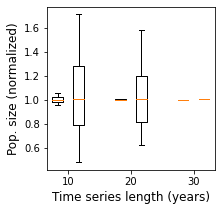

In [23]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(3, 3))
N_T = N_0*0.5
ax.boxplot([L2_min_11[0,:,0]/N_0, L2_min_11[1,:,0]/N_0, L2_min_11[2,:,0]/N_0], whis=[5, 95], showfliers=False, positions=[1,4,7])
#ax.boxplot([L2_min_11[0,:,1]/N_0, L2_min_11[1,:,1]/N_0, L2_min_11[2,:,1]/N_0], whis=[5, 95], showfliers=False, positions=[2,5,8])
ax.boxplot([L2_min_11[0,:,1]/N_T, L2_min_11[1,:,1]/N_T, L2_min_11[2,:,1]/N_T], whis=[5, 95], showfliers=False, positions=[2,5,8])

ax.set_xticks([1.5,4.5,7.5], ['10', '20', '30'])
ax.set_xlabel('Time series length (years)', fontsize=12)
ax.set_ylabel('Pop. size (normalized)', fontsize=12)
pass;

## Compiling the four plots into one figure

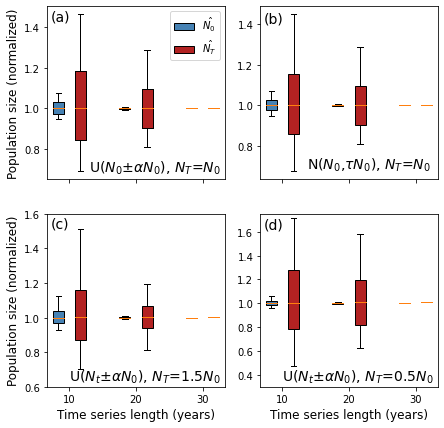

In [24]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(7, 7))

bp1 = axs[0,0].boxplot([L2_min_00[0,:,0]/N_0, L2_min_00[1,:,0]/N_0, L2_min_00[2,:,0]/N_0], whis=[5, 95], showfliers=False, positions=[1,4,7], patch_artist=True, boxprops = dict(facecolor = "steelblue"))
bp2 = axs[0,0].boxplot([L2_min_00[0,:,1]/N_0, L2_min_00[1,:,1]/N_0, L2_min_00[2,:,1]/N_0], whis=[5, 95], showfliers=False, positions=[2,5,8], patch_artist=True, boxprops = dict(facecolor = "firebrick"))
axs[0,0].boxplot([L2_min_00[0,:,0]/N_0, L2_min_00[1,:,0]/N_0, L2_min_00[2,:,0]/N_0], whis=[5, 95], showfliers=False, positions=[1,4,7], patch_artist=True, boxprops = dict(facecolor = "steelblue"))
axs[0,0].boxplot([L2_min_00[0,:,1]/N_0, L2_min_00[1,:,1]/N_0, L2_min_00[2,:,1]/N_0], whis=[5, 95], showfliers=False, positions=[2,5,8], patch_artist=True, boxprops = dict(facecolor = "firebrick"))
axs[0,0].set_xticks([1.5,4.5,7.5], ['','','']) #['10', '20', '30'])
axs[0,0].set_ylabel('Population size (normalized)', fontsize=12)
axs[0,0].text(0.65,0.98*np.quantile(L2_min_00[0,:,1]/N_0,0.95),'(a)', fontsize=14)
axs[0,0].text(2.4,np.quantile(L2_min_00[0,:,1]/N_0,0.05),r'U($N_0$$\pm$$\alpha$$N_0$), $N_T$=$N_0$', fontsize=14)
#ax[0,0].legend(["N_0", "N_T"],loc="upper right",fontsize=8)
axs[0,0].legend([bp1["boxes"][0], bp2["boxes"][0]], [r'$\hat{N_0}$', r'$\hat{N_T}$'], loc='upper right')

axs[0,1].boxplot([L2_min_01[0,:,0]/N_0, L2_min_01[1,:,0]/N_0, L2_min_01[2,:,0]/N_0], whis=[5, 95], showfliers=False, positions=[1,4,7], patch_artist=True, boxprops = dict(facecolor = "steelblue"))
axs[0,1].boxplot([L2_min_01[0,:,1]/N_0, L2_min_01[1,:,1]/N_0, L2_min_01[2,:,1]/N_0], whis=[5, 95], showfliers=False, positions=[2,5,8], patch_artist=True, boxprops = dict(facecolor = "firebrick"))
#axs[0,1].set_xticks([1.5,4.5,7.5], ['10', '20', '30'])
axs[0,1].set_xticks([1.5,4.5,7.5], ['','',''])
axs[0,1].text(0.65,0.97*np.quantile(L2_min_01[0,:,1]/N_0,0.95),'(b)', fontsize=14)
#axs[0,1].text(5.5,np.quantile(L2_min_00[0,:,1]/N_0,0.05),'Normal', fontsize=14)
axs[0,1].text(2.6,np.quantile(L2_min_00[0,:,1]/N_0,0.05),r'N($N_0$,$\tau$$N_0$), $N_T$=$N_0$', fontsize=14)

N_T = 3000
axs[1,0].boxplot([L2_min_10[0,:,0]/N_0, L2_min_10[1,:,0]/N_0, L2_min_10[2,:,0]/N_0], whis=[5, 95], showfliers=False, positions=[1,4,7], patch_artist=True, boxprops = dict(facecolor = "steelblue"))
axs[1,0].boxplot([L2_min_10[0,:,1]/N_T, L2_min_10[1,:,1]/N_T, L2_min_10[2,:,1]/N_T], whis=[5, 95], showfliers=False, positions=[2,5,8], patch_artist=True, boxprops = dict(facecolor = "firebrick"))
axs[1,0].set_xticks([1.5,4.5,7.5], ['10', '20', '30'])
axs[1,0].set_ylabel('Population size (normalized)', fontsize=12)
axs[1,0].set_xlabel('Time series length (years)', fontsize=12)
ymin = 0.6
ymax = 1.6
axs[1,0].set_ylim([ymin, ymax])
axs[1,0].text(0.65,1.52,'(c)', fontsize=14)
axs[1,0].text(1.5,0.635,r'U($N_t$$\pm$$\alpha$$N_0$), $N_T$=1.5$N_0$', fontsize=14)

N_T = 1000
L2_min_11[2,:,1] = [1007]*num_rep
axs[1,1].boxplot([L2_min_11[0,:,0]/N_0, L2_min_11[1,:,0]/N_0, L2_min_11[2,:,0]/N_0], whis=[5, 95], showfliers=False, positions=[1,4,7], patch_artist=True, boxprops = dict(facecolor = "steelblue"))
axs[1,1].boxplot([L2_min_11[0,:,1]/N_T, L2_min_11[1,:,1]/N_T, L2_min_11[2,:,1]/N_T], whis=[5, 95], showfliers=False, positions=[2,5,8], patch_artist=True, boxprops = dict(facecolor = "firebrick"))
axs[1,1].set_xticks([1.5,4.5,7.5], ['10', '20', '30'])
axs[1,1].set_xlabel('Time series length (years)', fontsize=12)
ymin = 0.3
ymax = 1.75
axs[1,1].set_ylim([ymin, ymax])
axs[1,1].text(0.65,1.63,'(d)', fontsize=14)
axs[1,1].text(1.5,0.35,r'U($N_t$$\pm$$\alpha$$N_0$), $N_T$=0.5$N_0$', fontsize=14)

save_dir = "figures/"
plt.savefig(save_dir + "Figure_S4.pdf", dpi=600, bbox_inches="tight")
pass;

## Testing effect of heteroscedacity - uniform distribution - increasing base trajectory

In [25]:
# Making base trajectories
T = [10, 20, 30]
N_0 = 2000
r = 0.2
h = [0.1805, 0.1973, 0.199575]
N_base = np.zeros((3,T[2]+1))

for k in range(3):
    N_base[k,0] = N_0
    for t in range(1,T[k]+1):
        index = np.arange(0,t)
        h_array = np.ones(t)
        h_sum = np.sum((h_array*(1+r))**index)  
        N_base[k,t] = N_base[k,0]*((1+r)**t - h[k]*h_sum)

In [26]:
%%time
# Uniform distribution - growing base population
r = 0.2
num_rep = 1000
time_series_length = [10, 20, 30]
init_pop = np.arange(1500,6000,5)
L2_min_10 = np.zeros((len(time_series_length),num_rep,3))
N_0 = 2000


counter0 = 0
for T in time_series_length:
    
    # Make num_rep observation series - uniform
    obs = np.zeros((num_rep,T+1))
    for j in range(num_rep):
        synt_obs = np.zeros(T+1)
        for i in range(T+1):
            #synt_obs[i] = np.random.uniform(N_base[counter0,i] - alfa*N_base[counter0,0], N_base[counter0,i] + alfa*N_base[counter0,0])
            synt_obs[i] = np.random.uniform(N_base[counter0,i] - alfa*N_base[counter0,i], N_base[counter0,i] + alfa*N_base[counter0,i])
        #obs[j,:] = synt_obs/N_0
        obs[j,:] = synt_obs/np.mean(N_base[counter0,1:T+1])
    
    for k in range(num_rep):
        L2 = 1000
        for pop in init_pop:
            # Calculate population trajectory and L2
            N = np.zeros(T+1)
            N[0] = pop
            for t in range(1,T+1):
                index = np.arange(0,t)
                h_array = np.ones(t)
                h_sum = np.sum((h_array*(1+r))**index)  
                N[t] = N[0]*(1+r)**t - h[counter0]*N_0*h_sum
                if N[t] < 0:
                    N[t] = 0

            # Calculate scaling factor s
            e = obs[k,:]  
            s = np.sum(np.multiply(N[1:], e[1:])) / np.sum(
                        np.multiply(N[1:],N[1:]))
            L2_new = (np.sum((s*N[1:] - e[1:])**2))**(1/2)
            if L2_new < L2:
                L2 = L2_new
                record = [N[0],N[-1],L2]
        L2_min_10[counter0,k,:] = record
    
    counter0 = counter0 + 1   


CPU times: user 12min 41s, sys: 44.1 s, total: 13min 25s
Wall time: 13min 20s


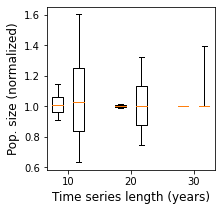

In [27]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(3, 3))
N_T = N_0*1.5
ax.boxplot([L2_min_10[0,:,0]/N_0, L2_min_10[1,:,0]/N_0, L2_min_10[2,:,0]/N_0], whis=[5, 95], showfliers=False, positions=[1,4,7])
ax.boxplot([L2_min_10[0,:,1]/N_T, L2_min_10[1,:,1]/N_T, L2_min_10[2,:,1]/N_T], whis=[5, 95], showfliers=False, positions=[2,5,8])

ax.set_xticks([1.5,4.5,7.5], ['10', '20', '30'])
ax.set_xlabel('Time series length (years)', fontsize=12)
ax.set_ylabel('Pop. size (normalized)', fontsize=12)
pass;